In [3]:
import tables
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

from matplotlib import pyplot as plt

In [4]:
for i in tqdm(range(50)):
    filename='/home/mr.bwolfe/Downloads/Data for Brandon-20220602T174855Z-001/Data for Brandon/new_mock_2d_'+str(i)+'.npy'
    d = np.load(filename)
    df=pd.DataFrame.from_records(d.tolist(), columns=d.dtype.names)
    if i==0: df2=df
    else: df2=df2.append(df)

  0%|          | 0/50 [00:00<?, ?it/s]

In [5]:
df2=df2.reset_index(drop=True)

r_Mpc=df2.hostr*1e6 #Pc
G = 4.3009e-3 #M_solar^-1 pc (km/s)^2

df2['vcirc']=np.sqrt(G*df2.hostm/r_Mpc)

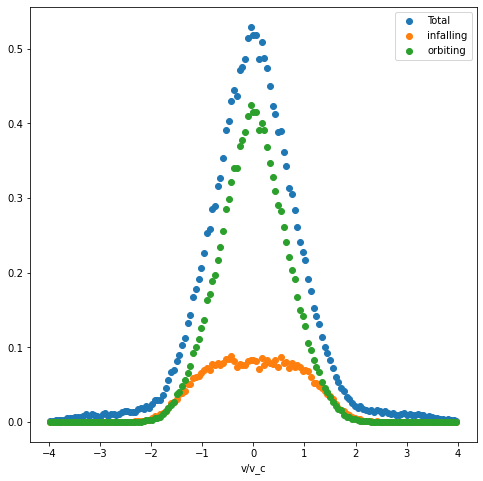

In [6]:
fig,(ax1) = plt.subplots(1, 1,figsize=(8,8))

minr=0.2
maxr=0.4

num_data_bin_edges = 150
min_x = -4
max_x = 4

data_x_vals = np.linspace(min_x, max_x, num_data_bin_edges)
data_bin_centers = (data_x_vals[:-1] + data_x_vals[1:])/2.
data_bin_width = data_bin_centers[1] - data_bin_centers[0]

#Cut between minr in R200m and maxr in R200m
dfcut=df2[ (df2.d2d>minr) & (df2.d2d<=maxr) ].copy().reset_index(drop=True)

#Plot all galaxies in the cut 
v=dfcut.v/dfcut.vcirc
counts, bin_edges = np.histogram(v, data_x_vals)
normalized_counts = counts / data_bin_width /len(dfcut)
ax1.scatter(data_bin_centers, normalized_counts, label='Total')

#Plot infalling galaxies
infdf=dfcut[dfcut.tag==1]

v=infdf.v/infdf.vcirc
counts, bin_edges = np.histogram(v, data_x_vals)
normalized_counts = counts  / data_bin_width/len(dfcut)
ax1.scatter(data_bin_centers, normalized_counts, label='infalling')

#Plot orbiting galaxies
orbdf=dfcut[dfcut.tag==0]

v=orbdf.v/orbdf.vcirc
counts, bin_edges = np.histogram(v, data_x_vals)
normalized_counts = counts / data_bin_width/len(dfcut)
ax1.scatter(data_bin_centers, normalized_counts, label='orbiting')

ax1.set_xlabel('v/v_c')
ax1.set_label('p(v/v_c)')
ax1.legend()